# $\chi^2$ fitting/minimisation:

Given the functional form:

$r(p) = \frac{y_i - f(x_i,p)}{\sigma_i}$

where $y_i$ are the data points and $f(x_i,p)$ is the model.


$\chi^2$ minimisation requires you to minimise it so that we find the best value of $p$:

$\min \sum_1^N (r(p))^2$

The advantage of this method is that you can include the uncertainties in $y_i$.

## Example 1: Simple Pendulum

Let's take a look at the simple pendulum experiment from physics 1.

In the lab, you are normally asked to collect data points for differents lengths and periods of simple pendulum experiments. To collect each data point, we fix the length of the pendulum, move the pendulum bob by a small angle and release it. Subsequently, we use a chronometer to record the time ot takes for the bob to complete a period. Several measurementes can be collected to build up statistics.

### Length-period relation:

The pendulum equations result in a physically-motivated model for the relationship between the lenght and period of the pendulum.

$$T = 2\pi\sqrt{\frac{L}{g}}$$

$$T = \frac{2\pi}{\sqrt{g}}\sqrt{L}$$

$$T = \beta\sqrt{L}$$


### Base example on LM regression:

- We will carry out an LM regression using the averages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Place the data file into a pandas df

def io_data(filename):
    """
    This is an I/O function that opens the pendulum data
    and return data arrays.
    Input: filename (str)
    Outputs: data arrays
    """
    
    # Create a pandas df
    df = pd.read_csv(filename, sep = ",")
    
    # Extract the arrays
    lengthp = np.array(df["Length(m)"])
    period1 = np.array(df["Period1(s)"])
    period2 = np.array(df["Period2(s)"])
    period3 = np.array(df["Period3(s)"])
    period4 = np.array(df["Period4(s)"])
    period5 = np.array(df["Period5(s)"])
    
    return lengthp, period1, period2, period3, period4, period5

In [18]:
# Define the path to the file

fname = "../sample-data/data_pendulum.csv"

# Call our function 

l, t1, t2, t3, t4, t5 = io_data(fname)

# Safe check
print(t1)
print(t2)
print(t3)
print(t4)
print(t5)

[0.53 0.92 1.17 1.27 1.37 1.52 1.66 1.81 1.94 1.99]
[0.52 0.91 1.14 1.3  1.36 1.55 1.61 1.79 1.9  1.98]
[0.6  0.93 1.15 1.31 1.4  1.56 1.69 1.82 1.92 2.04]
[0.65 0.92 1.16 1.27 1.41 1.54 1.67 1.83 1.92 1.95]
[0.59 0.89 1.18 1.29 1.42 1.53 1.65 1.83 1.93 1.96]


### Calculate the mean and std of the period

- np.mean()

- np.std()

In [29]:
# Place the mean and std into:

#new_arr = np.array([t1, t2, t3, t4, t5])
#print(new_arr.shape)

mean_t = np.mean(np.array([t1, t2, t3, t4, t5]), axis = 0)

stdv_t = np.std(np.array([t1, t2, t3, t4, t5]), axis = 0)

#print(mean_t.size)
#print(stdv_t.size)

#print(mean_t)
#print(stdv_t)

### Plotting mean period vs. pendulum length




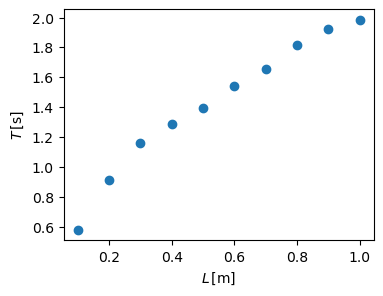

In [35]:
plt.figure(figsize=(4,3))

plt.plot(l, mean_t, marker = "o", linestyle = " ")

plt.xlabel(r"$L\,\rm [m]$")
plt.ylabel(r"$T\,\rm [s]$")
plt.show()

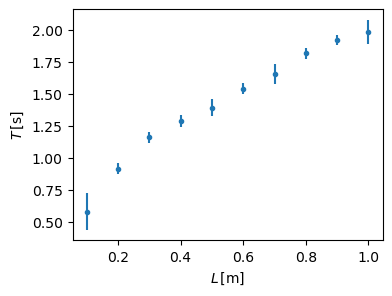

In [39]:
plt.figure(figsize=(4,3))

plt.errorbar(l, mean_t, 3*stdv_t, 0, marker = ".", linestyle = " ")

plt.xlabel(r"$L\,\rm [m]$")
plt.ylabel(r"$T\,\rm [s]$")
plt.show()

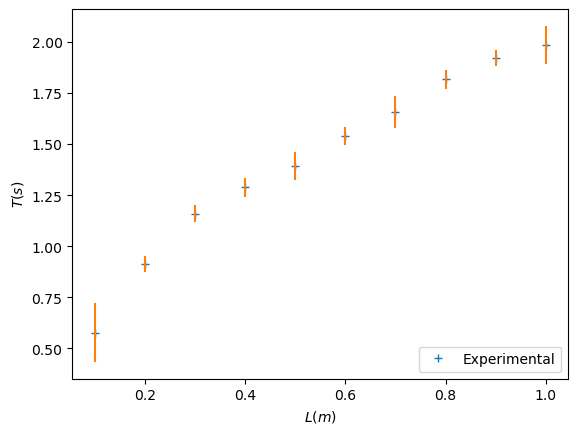

In [42]:
# Plot of the data

fig, ax = plt.subplots()

ax.plot(l, mean_t, linestyle = " ", marker = "+", label = "Experimental")
ax.errorbar(l, mean_t, yerr = 3*stdv_t, linestyle = " ")

ax.set_xlabel(r"$L (m)$")
ax.set_ylabel(r"$T (s)$")

plt.legend(loc = 4)

plt.show()

### Applying the LM method:

In [45]:
import scipy.stats as st
import scipy.optimize as opt

In [46]:
# Let's calculate these coefficients

# 1. Spearman coefficient -> monoticity
sp = st.spearmanr(l, mean_t)

# 2. Pearson coefficient -> linearity
pe = st.pearsonr(l, mean_t)

print("Spearman:\n", sp)

print("Pearson:\n", pe)

Spearman:
 SpearmanrResult(correlation=0.9999999999999999, pvalue=6.646897422032013e-64)
Pearson:
 (0.9817728684255518, 4.724114037134159e-07)


### Physically motivated model:

$$T = \beta\sqrt{L}$$


We will carry out the regression using curve_fit().

In [48]:
# Model function

def fit_model(x_values, beta):
    """
    This is our regression model.
    Inputs: x_values (lengths), beta -> free param.
    Output: y_values model
    """
    y_values = beta*np.sqrt(x_values)
    
    return y_values

In [51]:
# Call the curve_fit function

coef, cova = opt.curve_fit(fit_model, l, mean_t)

print(coef)

# Calculate uncertainties
unc_coef = np.sqrt(np.diag(cova))

print("The associated uncertainty are:\n", unc_coef)

[2.00651334]
The associated uncertainty are:
 [0.01442027]


### Plotting the regression result:

In [52]:
# Evaluate l in the regression model
mean_t_fit = fit_model(l, coef)


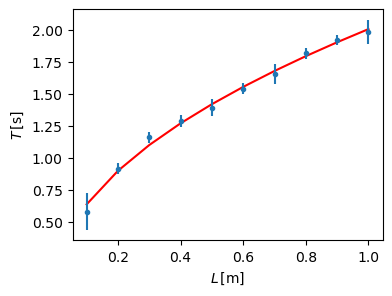

In [53]:
plt.figure(figsize=(4,3))

plt.plot(l, mean_t_fit, color = "red")
plt.errorbar(l, mean_t, 3*stdv_t, 0, marker = ".", linestyle = " ")

plt.xlabel(r"$L\,\rm [m]$")
plt.ylabel(r"$T\,\rm [s]$")
plt.show()

### Calculating the acceleration of gravity:

$$g=\left(\frac{2\pi}{\beta}\right)^2$$

In [55]:
print("g in m/s^2= ", (2*np.pi/coef)**2)

g in m/s^2=  [9.80563301]


### Method 1. Using our own functions:

### Method 2: Optimisation routine to minimise our $\chi^2$ function:

We will use minimize from scipy.optimize:

We can use opt.minimize from the scipy package.


https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html


This function minimises a scalar function of one or more variables.


The optimization result is represented as a OptimizeResult object with attributes:


- **x** the solution array
- **success** a Boolean flag indicating if the optimizer exited successfully
- **a message** which describes the cause of the termination.




### Compare to the LM method:

## Example 2:  spectral fitting via $\chi^2$:

We are going to generate a noisy synthetic spectrum and use $\chi^2$ minimisation to find the best-fit model.

#### 1. Synthetic spectrum:

Gaussian profile:

$$g(x) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left( -\frac{1}{2} \frac{(x - \mu)^2}{\sigma^2} \right).$$

#### 2. Error bars

#### 3. LM fitting with curve_fit():

#### 4. $\chi^2$ fitting with curve_fit():

#### 5. LM vs. $\chi^2$ Method Comparison

#### 5. Goodness of fit test:

We need to compute the $\chi^2$ statistic to assess how good/bad was out fit.

#### 7. New model including baseline: